## Employees leaving prematurely

### Introduction

The data set for this example contains data on employee turnover. The data are intended to be used for predicting turnover, but I use it here for illustrating some basic exporatory tools provided by R. The data cover 14,999 employees of a corporation and contains 10 attributes:

* The employee satisfaction level, in the 0-1 range (`satisfaction`).

* The last evaluation by his/her superior, in the 0-1 range (`eval`).

* The number of projects in which the employee has participated (`projects`).

* The average monthly hours worked (`hours`).

* The time spent at the company, in years (`time`).

* A dummy indicating whether the employee has had a work accident (`accident`).

* A dummy indicating whether the employee has had a promotion in the last 5 years (`promotion`).

* The actual department to which the employee is assigned, with 10 values (`dept`).

* The actual salary, with three levels, low, medium and high (`salary`).

* A  dummy indicating whether the employee has left the company (`left`).

### Importing the data

We import the file with the function `read.csv`, from a remote location (a GitHub repository). Without the argument `stringsAsFactors`, the categorical variables `department` and `salary` would be imported as factors, instead of character vectors.


In [1]:
turnover = read.csv('https://raw.githubusercontent.com/iese-bad/DataSci/master/Data/turnover.csv',
    stringsAsFactors=FALSE)

I perform some checks on the data frame, starting with the dimensions. 

In [2]:
print(dim(turnover))

[1] 14999    10


What the functions `head` and `tail` do is obvious. You can use a second argument which controls the number of rows returned. The default is 6. So we can print the first 10 rows of our data set as follows.

In [3]:
print(head(turnover, 10))

   satisfaction eval projects hours time accident left promotion  dept salary
1          0.38 0.53        2   157    3        0    1         0 sales    low
2          0.80 0.86        5   262    6        0    1         0 sales medium
3          0.11 0.88        7   272    4        0    1         0 sales medium
4          0.72 0.87        5   223    5        0    1         0 sales    low
5          0.37 0.52        2   159    3        0    1         0 sales    low
6          0.41 0.50        2   153    3        0    1         0 sales    low
7          0.10 0.77        6   247    4        0    1         0 sales    low
8          0.92 0.85        5   259    5        0    1         0 sales    low
9          0.89 1.00        5   224    5        0    1         0 sales    low
10         0.42 0.53        2   142    3        0    1         0 sales    low


Also, the **structure** of an `R` object can be explored with the function `str`. Actually, `turnover` is a data frame, with 14,999 and 10 columns. Note that `dept` and `salary` are character vectors, while the rest are numeric. Although the distinction between numeric and integer types may be interesting for the programmers concerned with memory management, it is irrelevant here. For the actual analysis, both things are "numbers". 

In [4]:
str(turnover)

'data.frame':	14999 obs. of  10 variables:
 $ satisfaction: num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ eval        : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ projects    : int  2 5 7 5 2 2 6 5 5 2 ...
 $ hours       : int  157 262 272 223 159 153 247 259 224 142 ...
 $ time        : int  3 6 4 5 3 3 4 5 5 3 ...
 $ accident    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ left        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ dept        : chr  "sales" "sales" "sales" "sales" ...
 $ salary      : chr  "low" "medium" "medium" "low" ...


### Summarizing

The function `summary` can have various outputs, depending on the nature of the argument. For a data frame, produces a conventional **statistical summary**.

In [5]:
summary(turnover)

  satisfaction         eval           projects         hours      
 Min.   :0.0900   Min.   :0.3600   Min.   :2.000   Min.   : 96.0  
 1st Qu.:0.4400   1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0  
 Median :0.6400   Median :0.7200   Median :4.000   Median :200.0  
 Mean   :0.6128   Mean   :0.7161   Mean   :3.803   Mean   :201.1  
 3rd Qu.:0.8200   3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0  
 Max.   :1.0000   Max.   :1.0000   Max.   :7.000   Max.   :310.0  
      time           accident           left          promotion      
 Min.   : 2.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median : 3.000   Median :0.0000   Median :0.0000   Median :0.00000  
 Mean   : 3.498   Mean   :0.1446   Mean   :0.2381   Mean   :0.02127  
 3rd Qu.: 4.000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :10.000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
     dept              salary         
 L

If a categorical variable is specified as a factor, the function `summary` produces a table which counts the observations of every value. If it is specified as a character vector, this table is not returned. The counts can be performed with the function `table` (with one argument).

In [6]:
tab1 = table(turnover[, 'dept'])
print(tab1)


         IT       RandD  accounting          hr  management   marketing 
       1227         787         767         739         630         858 
product_mng       sales     support   technical 
        902        4140        2229        2720 


As any other vector, the oputput of the function `table` can be sorted.

In [7]:
print(sort(tab1, decreasing=TRUE))


      sales   technical     support          IT product_mng   marketing 
       4140        2720        2229        1227         902         858 
      RandD  accounting          hr  management 
        787         767         739         630 


With two arguments, the function `table` is used for cross tabulation. Note that the first argument identifies the variable that comes in the rows. 

In [8]:
tab2 = table(turnover[, 'dept'], turnover[, 'salary'])
print(tab2)

             
              high  low medium
  IT            83  609    535
  RandD         51  364    372
  accounting    74  358    335
  hr            45  335    359
  management   225  180    225
  marketing     80  402    376
  product_mng   68  451    383
  sales        269 2099   1772
  support      141 1146    942
  technical    201 1372   1147


The function `tapply` is typically used to summarize a variable by group in a one-way **pivot table**. The first argument is the variable that we wish to summarize, the second argument is the grouping variable and the third one the summary statistic. In this case, since `left` is a dummy, the mean is equal to the proportion of ones, that is, to the actual turnover rate. Note that, although we use this function for statistical summaries, it can be applied as far as the function in the third argument makes sense for the vector in the first argument.

In [9]:
tab3 = tapply(turnover[, 'left'], turnover[, 'salary'], mean)
print(round(tab3, 3))

  high    low medium 
 0.066  0.297  0.204 


Some people prefer a graphical version of such tables. For the pivot table `tab3`, the natural visualization would be a bar plot, which can be produced with the function `barplot`, as you can see below. The graphical argument `main` specifies the title of the figure.

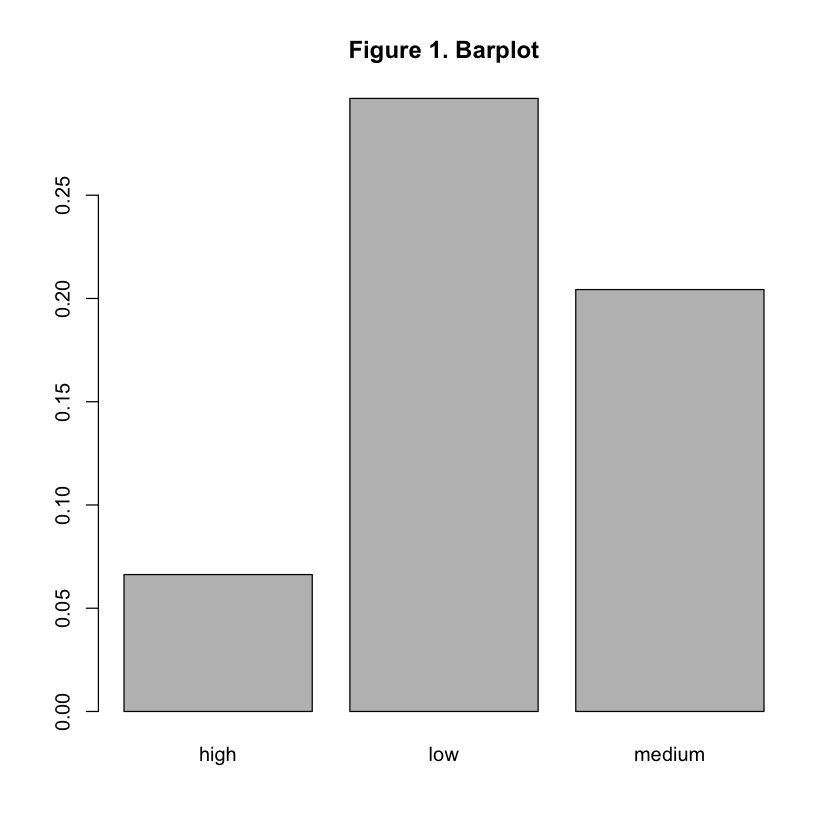

In [10]:
barplot(tab3, main='Figure 1. Barplot')

Another example follows.

In [11]:
tab4 = tapply(turnover[, 'left'], turnover[, 'dept'], mean)
print(round(sort(tab4, decreasing=TRUE), 3))

         hr  accounting   technical     support       sales   marketing 
      0.291       0.266       0.256       0.249       0.245       0.237 
         IT product_mng       RandD  management 
      0.222       0.220       0.154       0.144 


### Correlation

With two arguments, the function `cor` applies to a pair of vectors, returning a number. With one argument, it applies to a data frame, returning a **correlation matrix**.

In [12]:
R = cor(turnover[, 1:8])
print(round(R, 2))

             satisfaction  eval projects hours  time accident  left promotion
satisfaction         1.00  0.11    -0.14 -0.02 -0.10     0.06 -0.39      0.03
eval                 0.11  1.00     0.35  0.34  0.13    -0.01  0.01     -0.01
projects            -0.14  0.35     1.00  0.42  0.20     0.00  0.02     -0.01
hours               -0.02  0.34     0.42  1.00  0.13    -0.01  0.07      0.00
time                -0.10  0.13     0.20  0.13  1.00     0.00  0.14      0.07
accident             0.06 -0.01     0.00 -0.01  0.00     1.00 -0.15      0.04
left                -0.39  0.01     0.02  0.07  0.14    -0.15  1.00     -0.06
promotion            0.03 -0.01    -0.01  0.00  0.07     0.04 -0.06      1.00


### Plotting

The **histogram** allows a quick glance at the distribution of a numeric variable. We use the function `hist`, The argument `main` has been already used in the bar plot. Here, I also specify the label for the horizontal axis in the argument `xlab`.

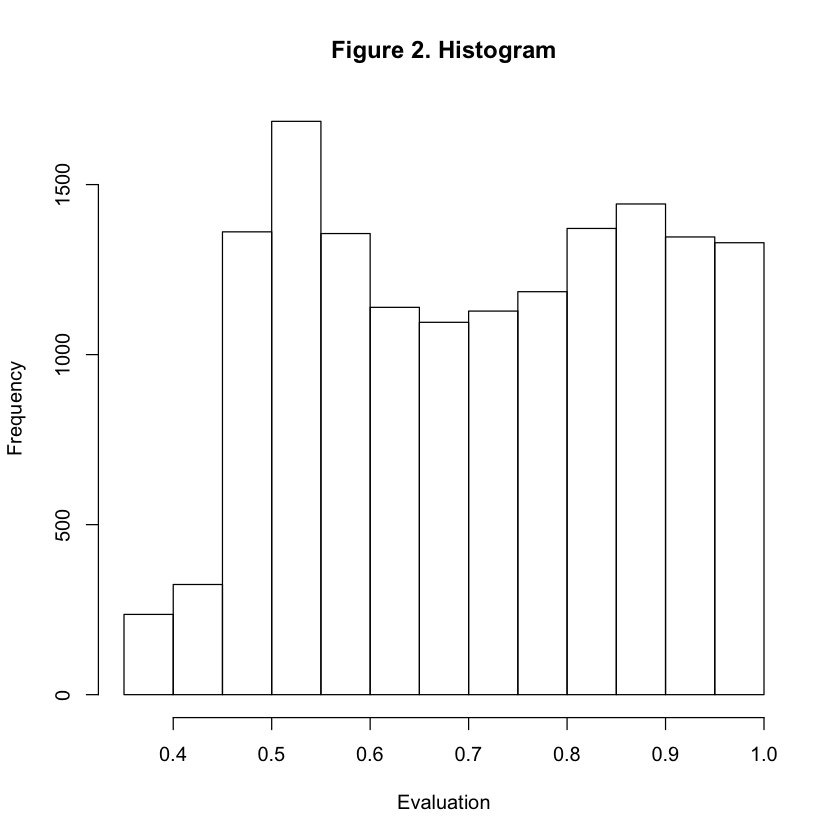

In [13]:
hist(turnover[, 'eval'], main='Figure 2. Histogram', xlab='Evaluation')

**Scatter plots** are very simple in `R` and allow for a lot of customization. The syntax is `plot(y ~ x)`. If the two vectors are extracted from the same data frame, is  practical to use the argument `data`. The argument `pch` controls the  dots used in the plot. `pch=16` and `pch=20` produce black circles of different size (my choice). With `pch='.'`, we get a dot with the same size as in text, adequate when the sample gets big.

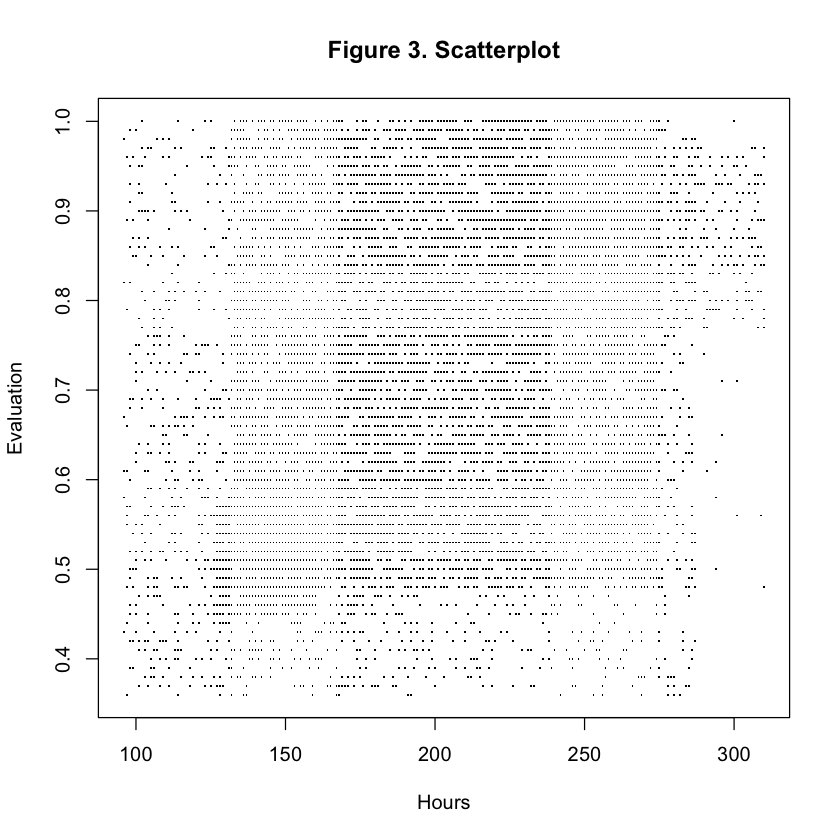

In [14]:
plot(eval ~ hours, data=turnover, pch='.', main='Figure 3. Scatterplot',
     xlab='Hours', ylab='Evaluation')